# House Price Prediction 
Predicting House Value/Price using Linear Regression

#### Outline
* Import Module
* Load Dataset
* Data Cleaning
* Data Manipulation
* Exploratory Data Analysis
* Data Preprocessing
* Training & Testing Model 
* Model Evaluation

### Import Module

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

### Load Dataset

In [11]:
df = pd.read_csv(r'C:\Users\jamor\Data Science Project\Dataset\housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Cleaning

In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [14]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
# replace na values with mean
df['total_bedrooms'] = df['total_bedrooms'].replace(np.nan, df['total_bedrooms'].mean())

### Data Manipulation

In [57]:
# perform discretization on age 
bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
labels = ['<=10', '10-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '>50']
df['housing_median_age_cat'] = pd.cut(df['housing_median_age'], bins, labels = labels)

In [ ]:
pd.cut()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   longitude               20640 non-null  float64 
 1   latitude                20640 non-null  float64 
 2   housing_median_age      20640 non-null  float64 
 3   total_rooms             20640 non-null  float64 
 4   total_bedrooms          20640 non-null  float64 
 5   population              20640 non-null  float64 
 6   households              20640 non-null  float64 
 7   median_income           20640 non-null  float64 
 8   median_house_value      20640 non-null  float64 
 9   ocean_proximity         20640 non-null  object  
 10  housing_median_age_cat  20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


### Exploratory Data Analysis

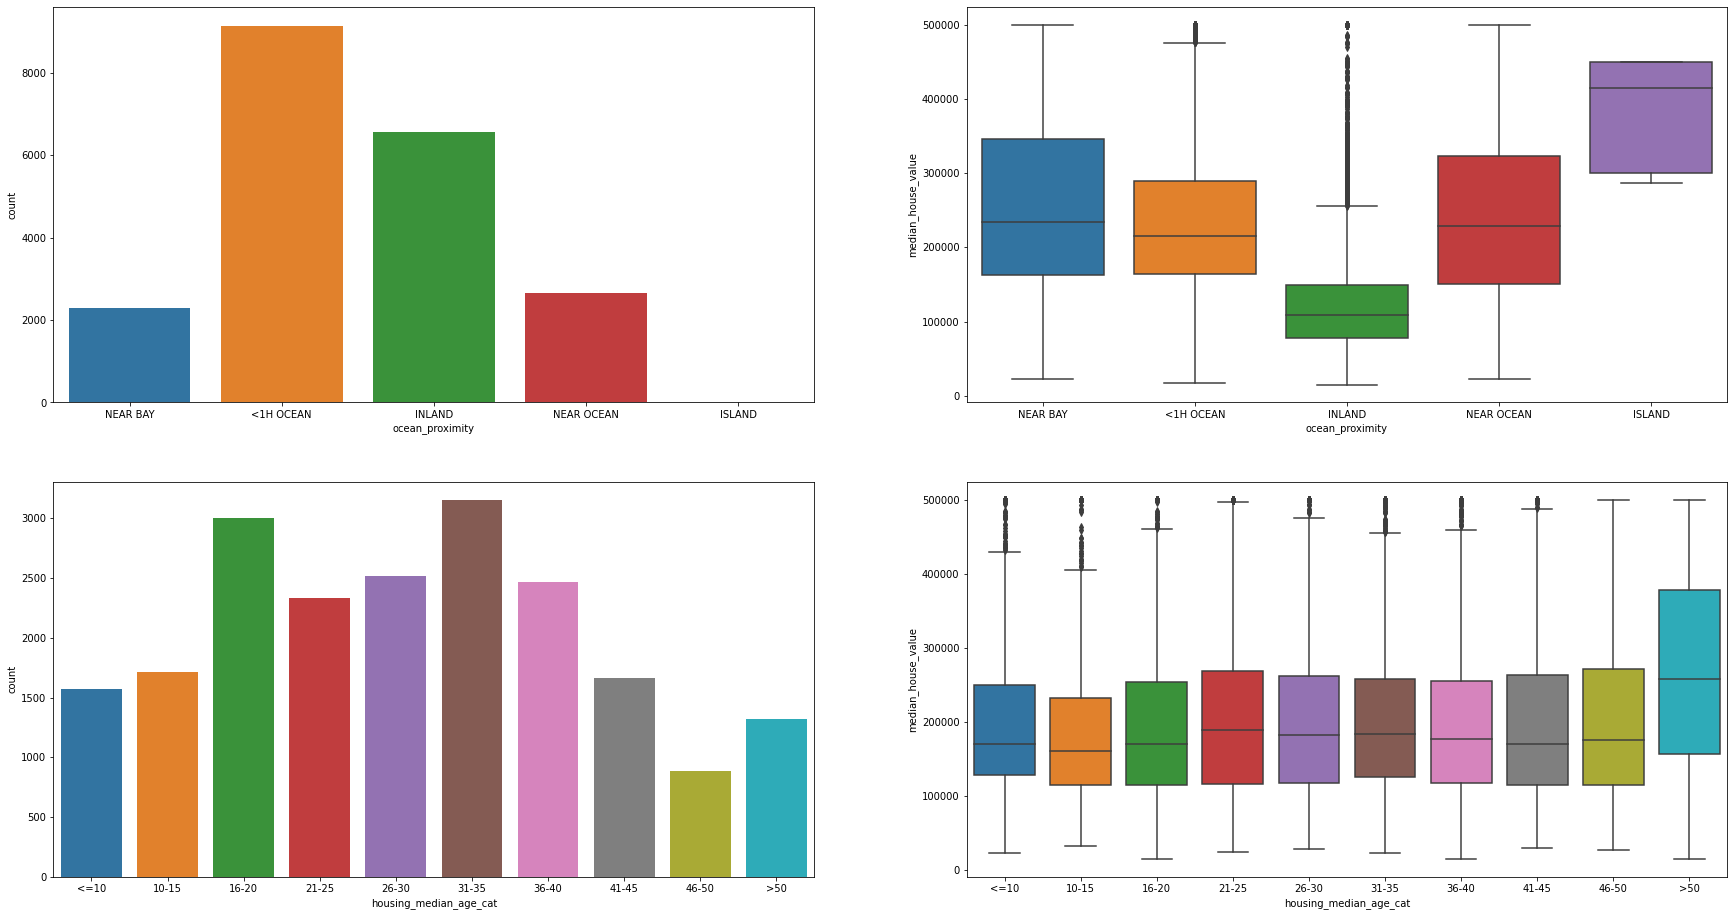

In [58]:
# Visualizing Categorical Values
plt.figure(figsize=(30,16))

# create custom function
def count_plot(x, y):
    plt.subplot(2, 2, y)
    sns.countplot(df[x])
def box_plot(x, y):
    plt.subplot(2, 2, y)
    sns.boxplot(df[x], df['median_house_value'])

    
count_plot('ocean_proximity', 1)
box_plot('ocean_proximity', 2)
count_plot('housing_median_age_cat', 3)
box_plot('housing_median_age_cat', 4)

plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   longitude               20640 non-null  float64 
 1   latitude                20640 non-null  float64 
 2   housing_median_age      20640 non-null  float64 
 3   total_rooms             20640 non-null  float64 
 4   total_bedrooms          20640 non-null  float64 
 5   population              20640 non-null  float64 
 6   households              20640 non-null  float64 
 7   median_income           20640 non-null  float64 
 8   median_house_value      20640 non-null  float64 
 9   ocean_proximity         20640 non-null  object  
 10  housing_median_age_cat  20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


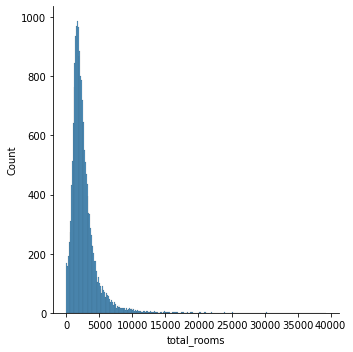

In [77]:
sns.displot(df['total_rooms'])

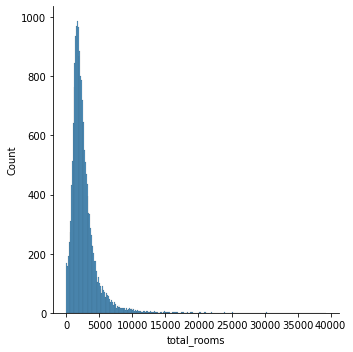

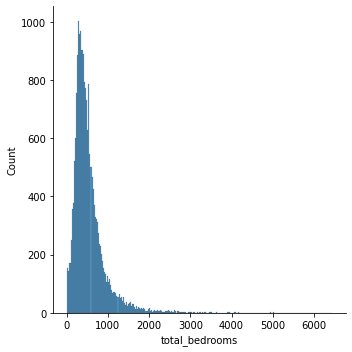

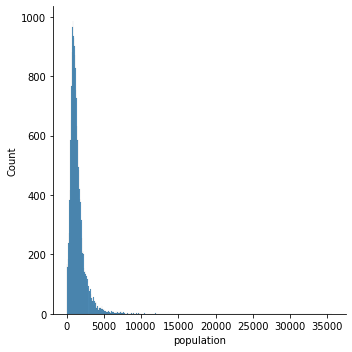

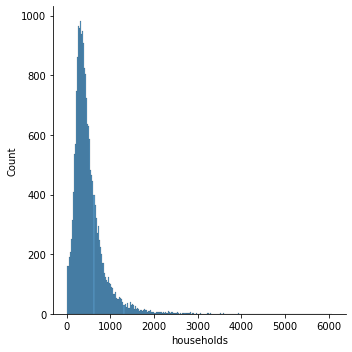

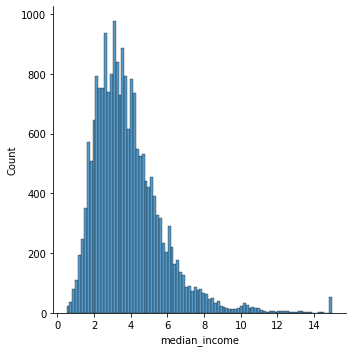

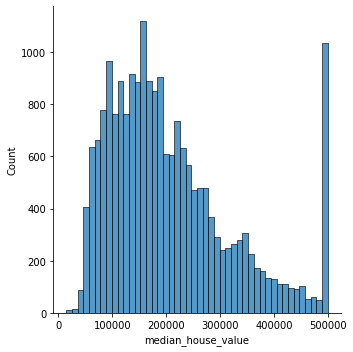

In [79]:
# visualizing distributions of numerical data
sns.displot(df['total_rooms'])
sns.displot(df['total_bedrooms'])
sns.displot(df['population'])
sns.displot(df['households'])
sns.displot(df['median_income'])
sns.displot(df['median_house_value'])

plt.show()

<AxesSubplot:>

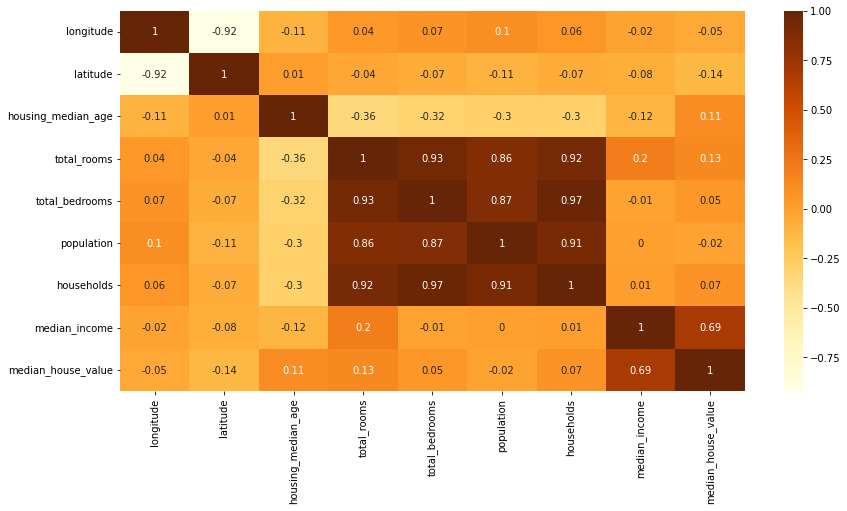

In [67]:
# visualizing correlogram
correlation = df.corr().round(2)
plt.figure(figsize=(14,7))
sns.heatmap(correlation, annot=True, cmap='YlOrBr')

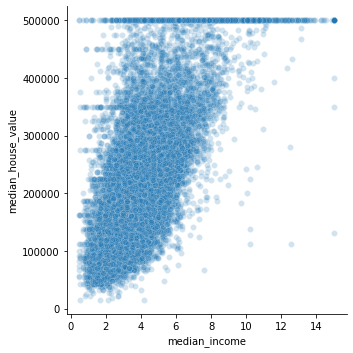

In [72]:
# inpect mendian income vs median house value
sns.relplot(df['median_income'], df['median_house_value'], alpha = 0.2)

### Data Preprocessing

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   longitude               20640 non-null  float64 
 1   latitude                20640 non-null  float64 
 2   housing_median_age      20640 non-null  float64 
 3   total_rooms             20640 non-null  float64 
 4   total_bedrooms          20640 non-null  float64 
 5   population              20640 non-null  float64 
 6   households              20640 non-null  float64 
 7   median_income           20640 non-null  float64 
 8   median_house_value      20640 non-null  float64 
 9   ocean_proximity         20640 non-null  object  
 10  housing_median_age_cat  20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [87]:
# Split Data into Target Variable 
X = df.drop(['median_house_value', 'housing_median_age_cat', 'longitude', 'latitude'], axis=1)
y = df['median_house_value']

In [98]:
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [99]:
# label encoder preprocessing 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X.iloc[:, 6] = le.fit_transform(X.iloc[:, 6])

In [105]:
y = np.array(y).reshape(-1, 1)

In [106]:
# standardized preprocessing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_standard = sc.fit_transform(X)
y_standard = sc.fit_transform(y)

In [109]:
# split into train & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_standard, test_size=0.3, random_state=42)

### Training & Testing Machine Learning Model

In [112]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
train = lr.fit(X_train, y_train)

In [116]:
print(f'Intercept : {train.intercept_}')
print(f'Coefficient : {train.coef_}')

Intercept : [-0.00159616]
Coefficient : [[ 0.20142231 -0.38156622  0.37859287 -0.32682863  0.39323578  0.7881184
   0.04747213]]


In [125]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1-r_squared)*(len(y) -1)/(len(y)-X.shape[1]-1)

print(f'R Squared : {r_squared}')
print(f'Adjusted R Squared: {adjusted_r_squared}')

R Squared : 0.5661279064016069
Adjusted R Squared: 0.5659807028025767


### Model Evaluation

In [128]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test, y_pred)
mse

0.48175289063194665

### Conclusion
1. The Model doesn't good enough
2. Need more proper data cleaning (treatment to outlier, more proper treatment to missing values)
3. Explor another machien learning model